<br> Radley Ciego </br>
<br> GTECH 78518: Environmental Data Science </br>
<br> November 15, 2022 </br>
<br> Homework #8 </br>

In [ ]:
# import libraries
from glob import glob
import os
import urllib

import rasterio as rio
from rasterio.plot import show
import xarray as xr
import rioxarray as rxr

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
os.chdir('/Users/radleyciego/GitHub/environmental-data-science/data/LC08_L1TP_020050_20211226_20220106_01_T1')
os.getcwd

In [ ]:
# create local directory to store images
imgdir = '/Users/radleyciego/GitHub/environmental-data-science/data/LC08_L1TP_020050_20211226_20220106_01_T1'
img_id = 'LC08_L1TP_020050_20211226_20220106_01_T1'
img = img_id

In [ ]:
fn = os.path.join(imgdir, img+'_B4.TIF')
print(fn)

In [ ]:
!gdalinfo $fn

In [ ]:
# specify filename for different bands we will need for the lab
b4_fn = os.path.join(imgdir, img+'_B4.TIF')
b5_fn = os.path.join(imgdir, img+'_B5.TIF')
b3_fn = os.path.join(imgdir, img+'_B3.TIF')

In [ ]:
with rio.open(b4_fn) as src:
    print(src.profile)

In [ ]:
with rio.open(b5_fn) as src:
    print(src.profile)

In [ ]:
b4 = rio.open(b4_fn)
b5 = rio.open(b5_fn)
b3 = rio.open(b3_fn)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(20,20), sharey=True)

# plot 2 bands
show(b4, ax=ax1)
show(b5, ax=ax2)
show(b3, ax=ax3)

# add titles
ax1.set_title("Blue")
ax2.set_title("Green")
ax3.set_title("Red")

/var/folders/ff/9n9lg70d5d79jcc1pfmzhbsc0000gn/T/ipykernel_9863/4063380688.py:3: RuntimeWarning: invalid value encountered in divide
  ndvi = (b5_np-b4_np)/(b5_np+b4_np)


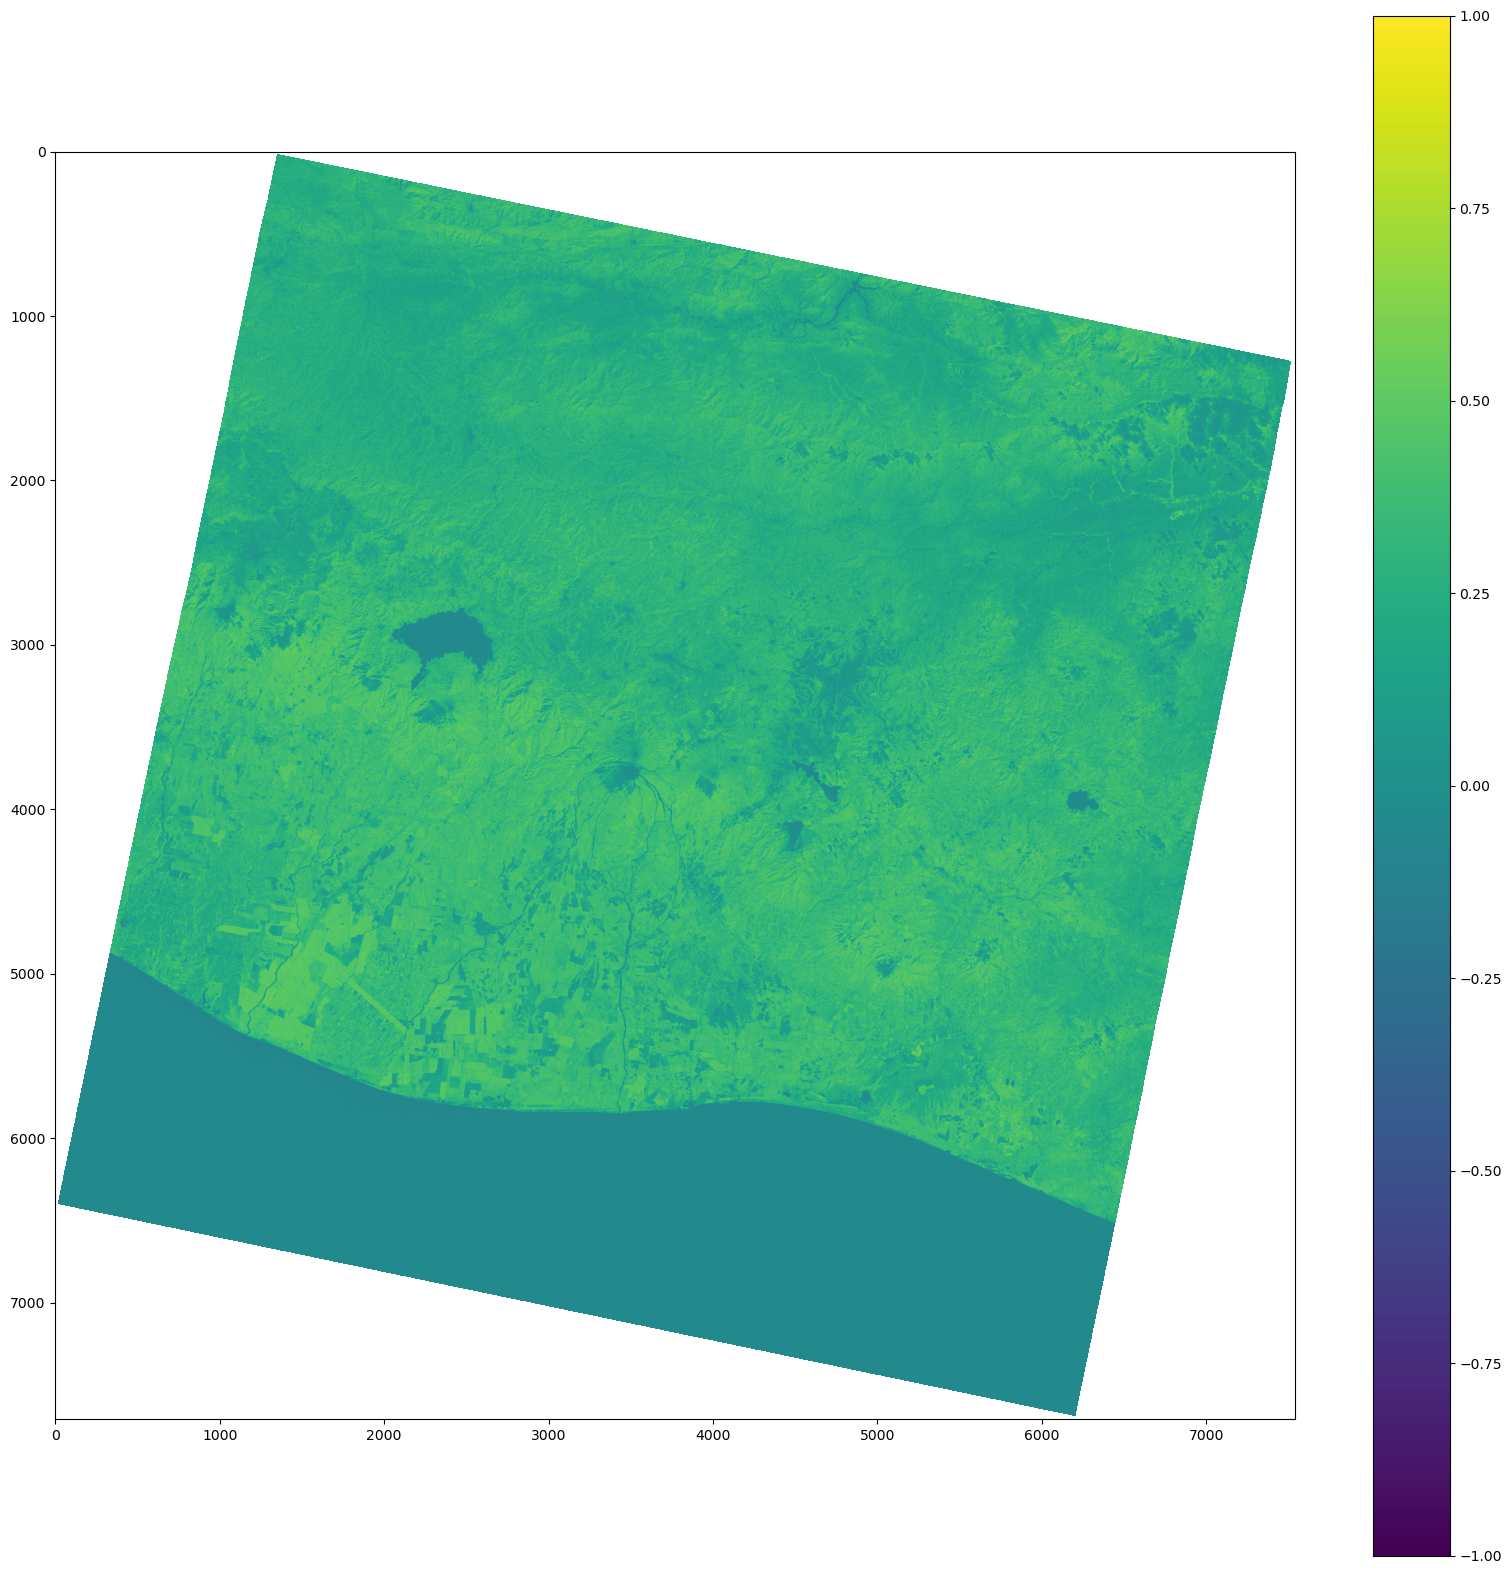

In [106]:
b5_np = b5.read(1).astype(float)/1000
b4_np = b4.read(1).astype(float)/1000
ndvi = (b5_np-b4_np)/(b5_np+b4_np)
fig = plt.subplots(figsize=(20, 20), sharey=True)
plt.imshow(ndvi)
plt.colorbar()